# Setting

## Install and import

In [ ]:
# install
!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [ ]:
# import 1
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

In [ ]:
# import 2
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot

## Read experiment data

In [ ]:
# read test data
from PIL import Image
image_test = Image.open('test_01.png')

'''Q'''
# why is not picture?
# because of crowd,
image_test.show()
print(image_test.format, image_test.size, image_test.mode)

PNG (114, 126) RGBA


<function matplotlib.pyplot.show(close=None, block=None)>

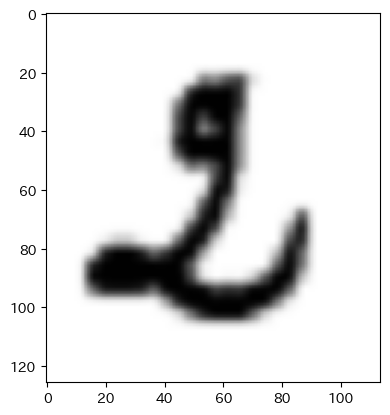

In [ ]:
# show the data
plt.imshow(image_test)
plt.axis('on')
plt.show

In [ ]:
print(type(image_test))

<class 'PIL.PngImagePlugin.PngImageFile'>


## Judge Gpu

mac is not cuda:0,

In [ ]:
# confirm cpu or gpu
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


## Read train data

In [ ]:
# read train data(experinence)
import torchvision.datasets as datasets
data_root = './data'

train_set0 = datasets.MNIST(
    root = data_root,
    train = True,
    download = True
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 58016398.15it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1648553.26it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13892799.97it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7763051.66it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# read train data and transform to the shape that neural network can use
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.Lambda(lambda x: x.view(-1))
])

train_set = datasets.MNIST(
    root=data_root, train=True, download=True, transform=transform
)

test_set = datasets.MNIST(
    root = data_root, train = False, download = True, transform = transform
)

# Look and setting train data

In [ ]:
train_set[0]

(tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -

In [ ]:
train_set[0][0]

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.00

In [ ]:
train_set[0][0].shape

torch.Size([784])

In [ ]:
train_set[0][0][1]

tensor(-1.)

In [ ]:
train_set[0][1]

5

In [ ]:
train_set[59999]

(tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -

In [ ]:
image, label = train_set[0]
print(image.shape)
print(image.data.min())
print(image.data.max())

torch.Size([784])
tensor(-1.)
tensor(1.)


Is there difference between image.data and image

In [ ]:
image.data

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.00

In [ ]:
image

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.00

In [ ]:
for i in range(784):
  if image.data[i] != train_set[0][0][i]:
    print(i)
    break

  else:
    continue

# Sepparate by Batch

In [ ]:
from torch.utils.data import DataLoader

batch_size = 500

train_loader = DataLoader(
    train_set, batch_size = batch_size, shuffle = True
)

test_loader = DataLoader(
    test_set, batch_size =batch_size, shuffle = False
)

In [ ]:
# break to continue, what happen?
# images, labels = train_loader, what happen?

In [ ]:
# last one
i = 0
for images, labels in train_loader:
    print(i)
    continue

print(images.shape)
print(labels.shape)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


KeyboardInterrupt: 

In [ ]:
images[1]

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.00

In [ ]:
for images, labels in train_loader:
    break

print(images.shape)
print(labels.shape)

torch.Size([500, 784])
torch.Size([500])


In [ ]:
images[1]

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.00

In [ ]:
# first one
i = 0
for a, b in train_loader:
    print(i)
    break


print(a.shape)
print(b.shape)

0
torch.Size([500, 784])
torch.Size([500])


In [ ]:
# It is correct because of suffle

In [ ]:
for i in range(784):
  if images[0][i] == a[0][i]:
    continue
  else:
    print(i)
    break

181


In [ ]:
# not suffle, however there is differnece.

In [ ]:
# from torch.utils.data import DataLoader

# batch_size = 500

# train_loader = DataLoader(
#     train_set, batch_size = batch_size, shuffle = False
# )

In [ ]:
train_loader

# Determine Model(Nural Network)

In [ ]:
# set parameters of Linner
n_input = image.shape[0]

n_output = len(set(list(labels.data.numpy())))

n_hidden = 128

print(n_input, n_output)

784 10


In [ ]:
# define Model
class Net(nn.Module):
  def __init__(self, n_input, n_output, n_hidden):
    super().__init__()

    self.l1 = nn.Linear(n_input, n_hidden)
    self.l2 = nn.Linear(n_hidden, n_hidden)
    self.l3 = nn.Linear(n_hidden, n_output)
    self.relu = nn.ReLU(inplace=True)

  def forward(self, x):
    x1 = self.l1(x)
    x2 = self.relu(x1)
    x3 = self.l2(x2)
    x4 = self.relu(x3)
    x5 = self.l3(x4)
    return x5

# Learning(Loss : CrossEntropy, Optimizer : SGD)

In [ ]:
torch.manual_seed(123)
torch.cuda.manual_seed(123)

lr = 0.01

net = Net(n_input, n_output, n_hidden) # .to(device)

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr = lr)

num_epochs = 100

history = np.zeros((0,5))

 parameters is defined?

In [ ]:
from tqdm.notebook import tqdm

for epoch in range(num_epochs):
  n_train_acc, n_val_acc = 0, 0
  train_loss, val_loss = 0, 0
  n_train, n_test = 0, 0

  for inputs, labels in tqdm(train_loader):

    train_batch_size = len(labels)

    n_train += train_batch_size

    inputs = inputs #.to(device)
    labels = labels #.to(device)

    optimizer.zero_grad()

    outputs = net(inputs)

    loss = criterion(outputs, labels)

    loss.backward()

    optimizer.step()

    # search max data by 1 line, and get index[1]
    predicted = torch.max(outputs, 1)[1]

    train_loss += loss.item() * train_batch_size
    n_train_acc += (predicted == labels).sum().item()

  for inputs_test, labels_test in test_loader:
    test_batch_size = len(labels_test)
    n_test += test_batch_size

    outputs_test = net(inputs_test)

    loss_test = criterion(outputs_test, labels_test)

    predicted_test = torch.max(outputs_test, 1)[1]

    val_loss += loss_test.item() * test_batch_size
    n_val_acc += (predicted_test == labels_test).sum().item()

  train_acc = n_train_acc / n_train
  val_acc = n_val_acc / n_test

  ave_train_loss = train_loss / n_train
  ave_val_loss = val_loss / n_test

  item = np.array([epoch+1, ave_train_loss, train_acc, ave_val_loss, val_acc])
  history = np.vstack((history, item))

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

In [ ]:
torch.save(net.state_dict(), 'net_weights.pth')

In [ ]:
print(f'初期状態: 損失: {history[0,3]:.5f} 精度: {history[0,4]:.5f}' )
print(f'最終状態: 損失: {history[-1,3]:.5f} 精度: {history[-1,4]:.5f}' )

初期状態: 損失: 2.04576 精度: 0.49800
最終状態: 損失: 0.13874 精度: 0.95810


# Predict image_test

resized picture is availavle?

In [ ]:
pip install Pillow

In [ ]:
test_path = 'test_01.png'
width, height = image_test.size

print(f'Image Path: {test_path}')
print(f'Width: {width} pixels')
print(f'Height: {height} pixels')

Image Path: test_01.png
Width: 114 pixels
Height: 126 pixels


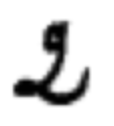

In [ ]:
gray_input = image_test.convert('L')
gray_input

In [ ]:
print(gray_input.info)

{'icc_profile': b'\x00\x00\x0f\xc0appl\x02\x10\x00\x00mntrRGB XYZ \x07\xe8\x00\x04\x00\x0c\x00\x0e\x00\n\x00\x10acspAPPL\x00\x00\x00\x00APPL\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-appl\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11desc\x00\x00\x01P\x00\x00\x00bdscm\x00\x00\x01\xb4\x00\x00\x04\x9ccprt\x00\x00\x06P\x00\x00\x00#wtpt\x00\x00\x06t\x00\x00\x00\x14rXYZ\x00\x00\x06\x88\x00\x00\x00\x14gXYZ\x00\x00\x06\x9c\x00\x00\x00\x14bXYZ\x00\x00\x06\xb0\x00\x00\x00\x14rTRC\x00\x00\x06\xc4\x00\x00\x08\x0caarg\x00\x00\x0e\xd0\x00\x00\x00 vcgt\x00\x00\x0e\xf0\x00\x00\x000ndin\x00\x00\x0f \x00\x00\x00>mmod\x00\x00\x0f`\x00\x00\x00(vcgp\x00\x00\x0f\x88\x00\x00\x008bTRC\x00\x00\x06\xc4\x00\x00\x08\x0cgTRC\x00\x00\x06\xc4\x00\x00\x08\x0caabg\x00\x00\x0e\xd0\x00\x00\x00 aagg\x00\x00\x0e\x

In [ ]:
gray_input.size

(114, 126)

<function matplotlib.pyplot.show(close=None, block=None)>

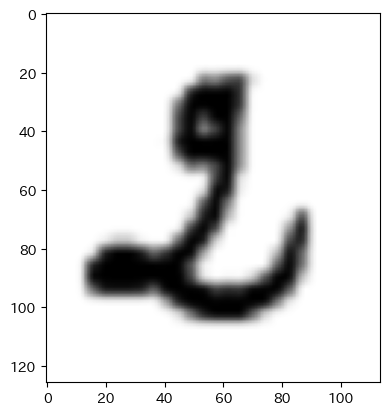

In [ ]:
plt.imshow(gray_input, cmap='gray')
plt.axis('on')
plt.show

In [ ]:
from PIL import ImageOps

In [ ]:
transform_sp = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.Resize((28,28))
])

input_test_01 = transform_sp(ImageOps.invert(gray_input))
input_test_01

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -0

In [ ]:
input_test_01.shape

torch.Size([1, 28, 28])

In [ ]:
input_test_01.size

<function Tensor.size>

In [ ]:
input_test_01.mode

<function Tensor.mode>

In [ ]:
input_test_01_x = input_test_01.view(-1)

In [ ]:
input_test_01_x.shape

torch.Size([784])

In [ ]:
fx = net(input_test_01_x.unsqueeze(0))
fx

tensor([[-1.6379e+00,  4.5885e+00,  6.7918e+00,  3.3456e+00, -1.0213e+01,
          5.0259e+00, -6.7706e-03, -5.3787e+00,  2.9377e+00, -7.7003e+00]],
       grad_fn=<AddmmBackward0>)

In [ ]:
predicted_y = torch.max(fx, 1)[1]
predicted_y

tensor([2])

In [ ]:
im_test_02 = Image.open('test_06.jpeg')

'''Q'''
# why is not picture?
image_test.show()
print(image_test.format, image_test.size, image_test.mode)

PNG (114, 126) RGBA


<function matplotlib.pyplot.show(close=None, block=None)>

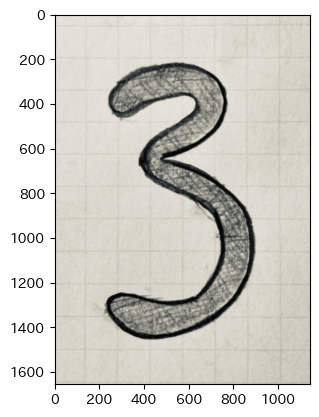

In [ ]:
plt.imshow(im_test_02)
plt.axis('on')
plt.show

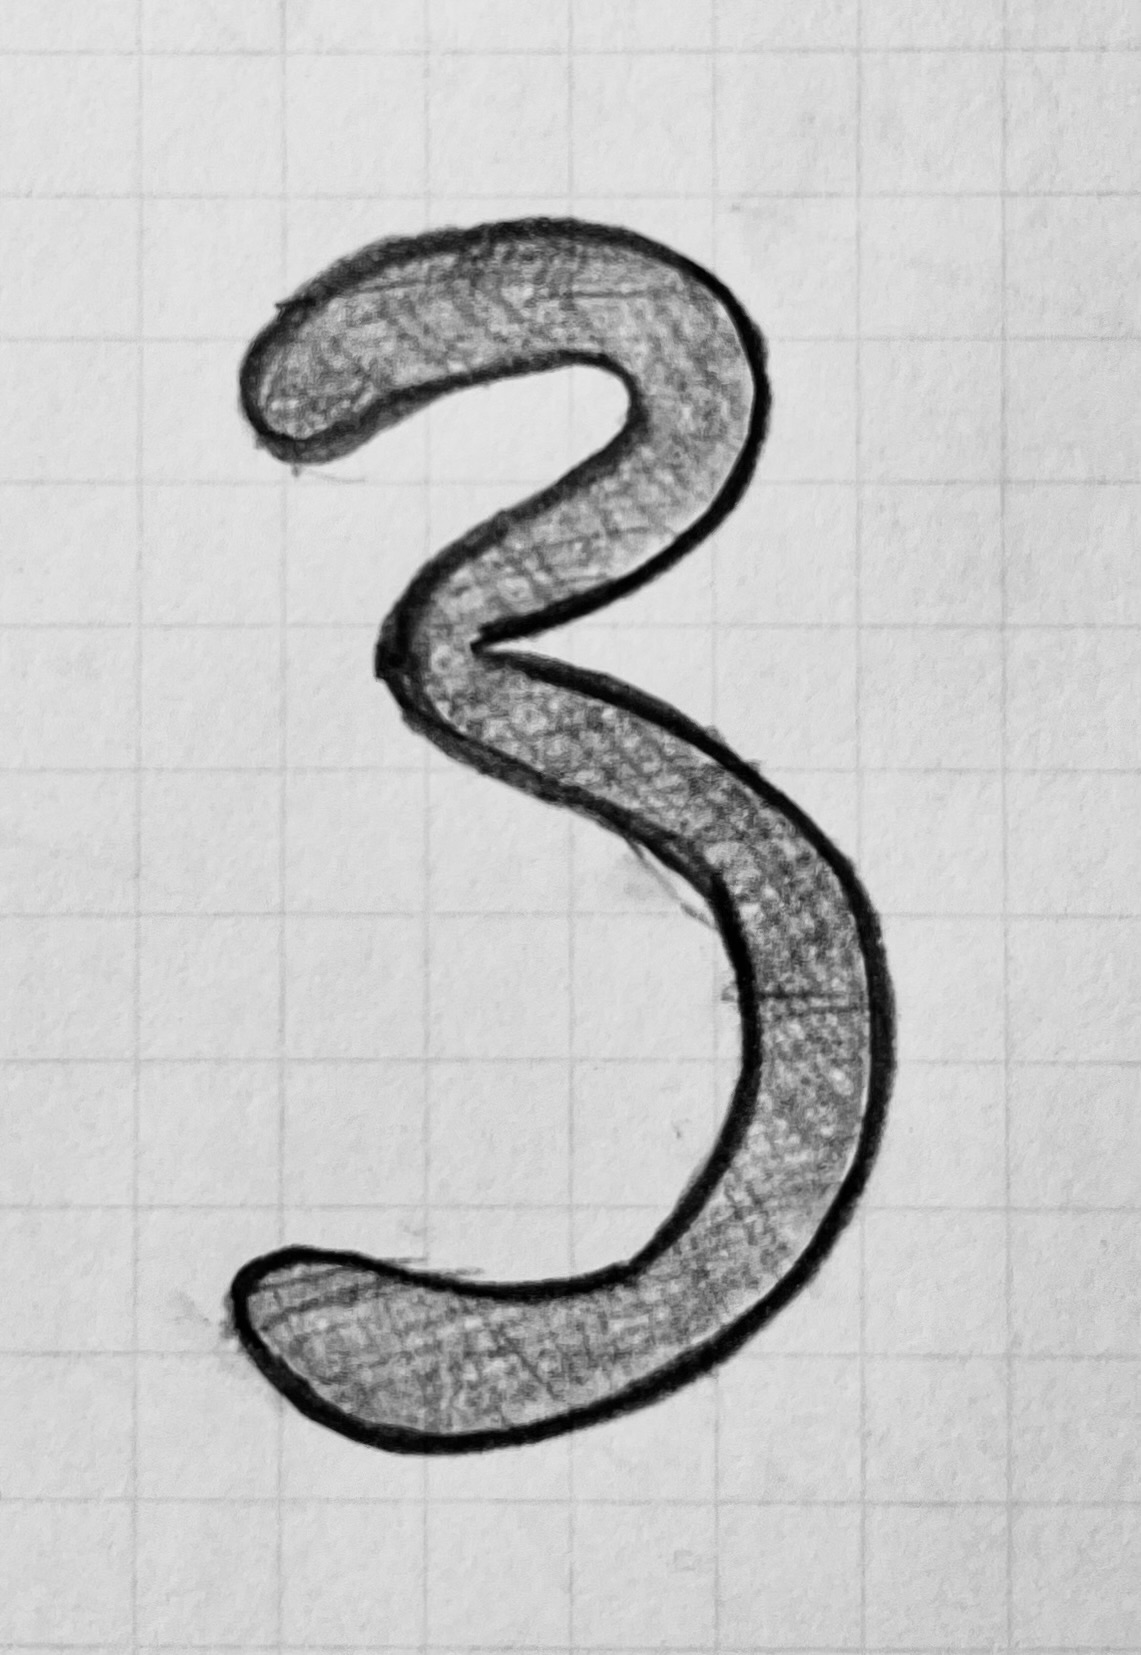

In [ ]:
gray_im_test_02 = im_test_02.convert('L')
gray_im_test_02

In [ ]:
input_02 = transform_sp(ImageOps.invert(gray_im_test_02))
input_02

tensor([[[-7.5584e-01, -7.5156e-01, -7.5425e-01, -7.4899e-01, -7.5466e-01,
          -7.4003e-01, -7.3122e-01, -7.4053e-01, -7.5701e-01, -7.6286e-01,
          -7.4782e-01, -7.5846e-01, -7.5168e-01, -7.3907e-01, -7.4025e-01,
          -7.4095e-01, -7.4574e-01, -7.2431e-01, -7.2157e-01, -7.0311e-01,
          -6.9474e-01, -6.9471e-01, -6.9326e-01, -6.8059e-01, -6.5401e-01,
          -6.5124e-01, -6.5419e-01, -6.5612e-01],
         [-7.5556e-01, -7.5330e-01, -7.5361e-01, -7.4786e-01, -7.5399e-01,
          -7.4860e-01, -7.4524e-01, -7.5603e-01, -7.5836e-01, -7.5675e-01,
          -7.3886e-01, -7.5040e-01, -7.4236e-01, -7.3299e-01, -7.3094e-01,
          -7.4225e-01, -7.4120e-01, -7.2291e-01, -7.1870e-01, -6.9849e-01,
          -6.8798e-01, -6.8274e-01, -6.9808e-01, -6.8719e-01, -6.5944e-01,
          -6.6074e-01, -6.6322e-01, -6.5970e-01],
         [-7.4903e-01, -7.4802e-01, -7.5011e-01, -7.4058e-01, -7.5031e-01,
          -7.5315e-01, -7.4894e-01, -7.5348e-01, -7.5453e-01, -7.5523e-01,


In [ ]:
input_02 = transform_sp(ImageOps.invert(gray_im_test_02))
input_02

tensor([[[-7.5584e-01, -7.5156e-01, -7.5425e-01, -7.4899e-01, -7.5466e-01,
          -7.4003e-01, -7.3122e-01, -7.4053e-01, -7.5701e-01, -7.6286e-01,
          -7.4782e-01, -7.5846e-01, -7.5168e-01, -7.3907e-01, -7.4025e-01,
          -7.4095e-01, -7.4574e-01, -7.2431e-01, -7.2157e-01, -7.0311e-01,
          -6.9474e-01, -6.9471e-01, -6.9326e-01, -6.8059e-01, -6.5401e-01,
          -6.5124e-01, -6.5419e-01, -6.5612e-01],
         [-7.5556e-01, -7.5330e-01, -7.5361e-01, -7.4786e-01, -7.5399e-01,
          -7.4860e-01, -7.4524e-01, -7.5603e-01, -7.5836e-01, -7.5675e-01,
          -7.3886e-01, -7.5040e-01, -7.4236e-01, -7.3299e-01, -7.3094e-01,
          -7.4225e-01, -7.4120e-01, -7.2291e-01, -7.1870e-01, -6.9849e-01,
          -6.8798e-01, -6.8274e-01, -6.9808e-01, -6.8719e-01, -6.5944e-01,
          -6.6074e-01, -6.6322e-01, -6.5970e-01],
         [-7.4903e-01, -7.4802e-01, -7.5011e-01, -7.4058e-01, -7.5031e-01,
          -7.5315e-01, -7.4894e-01, -7.5348e-01, -7.5453e-01, -7.5523e-01,


<function matplotlib.pyplot.show(close=None, block=None)>

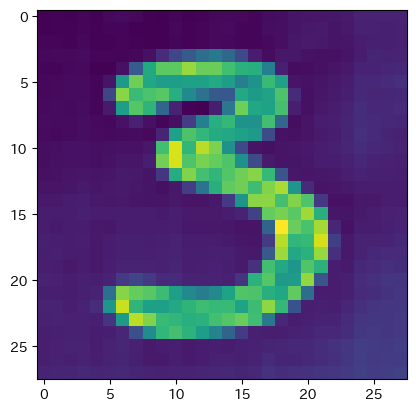

In [ ]:
plt.imshow(input_02[0])
plt.axis('on')
plt.show

In [ ]:
input_02_x = input_02.view(-1)
input_02_x.shape

torch.Size([784])

In [ ]:
# 行列にしてあげる（unsqueeze）
out_02 = net(input_02_x.unsqueeze(0))
out_02

tensor([[-1.2558,  0.7357, -0.3037,  5.9743, -3.9380,  3.1856, -3.4690, -0.4863,
         -0.1419, -1.3886]], grad_fn=<AddmmBackward0>)

In [ ]:
pre_y_02 = torch.max(out_02, 1)[1]
pre_y_02

tensor([3])

In [ ]:
for parameters in net.parameters():
  print(parameters)

Parameter containing:
tensor([[-0.0161, -0.0003, -0.0192,  ...,  0.0263,  0.0185,  0.0301],
        [ 0.0132, -0.0373,  0.0123,  ...,  0.0037, -0.0080, -0.0085],
        [ 0.0081,  0.0249,  0.0063,  ...,  0.0050,  0.0255, -0.0270],
        ...,
        [ 0.0190, -0.0071, -0.0174,  ...,  0.0278, -0.0104, -0.0214],
        [-0.0318, -0.0248,  0.0135,  ..., -0.0039,  0.0017,  0.0345],
        [ 0.0141, -0.0122, -0.0248,  ...,  0.0279, -0.0205, -0.0287]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0340, -0.0246,  0.0024,  0.0235,  0.0305, -0.0238, -0.0167, -0.0306,
         0.0161, -0.0068,  0.0228,  0.0194, -0.0164,  0.0014, -0.0214,  0.0317,
         0.0345, -0.0145,  0.0276,  0.0351, -0.0079, -0.0350,  0.0246, -0.0083,
         0.0330,  0.0122,  0.0168,  0.0102,  0.0178, -0.0197,  0.0220, -0.0219,
         0.0347,  0.0195,  0.0360,  0.0191,  0.0235, -0.0058,  0.0315, -0.0052,
        -0.0138, -0.0408,  0.0237,  0.0003,  0.0195,  0.0037,  0.0335, -0.0065,
        -0.0130

In [ ]:
# define Model
class Net(nn.Module):
  def __init__(self, n_input, n_output, n_hidden):
    super().__init__()

    self.l1 = nn.Linear(n_input, n_hidden)
    self.l2 = nn.Linear(n_hidden, n_hidden)
    self.l3 = nn.Linear(n_hidden, n_output)
    self.relu = nn.ReLU(inplace=True)

  def forward(self, x):
    x1 = self.l1(x)
    x2 = self.relu(x1)
    x3 = self.l2(x2)
    x4 = self.relu(x3)
    x5 = self.l3(x4)
    return x5

In [ ]:
net_inf = Net(n_input, n_output, n_hidden)
net_inf.load_state_dict(torch.load('net_weights.pth'))
net_inf.eval()

Net(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)

In [ ]:
im_test_02 = Image.open('test_06.jpeg')

'''Q'''
# why is not picture?
image_test.show()
print(image_test.format, image_test.size, image_test.mode)

PNG (114, 126) RGBA


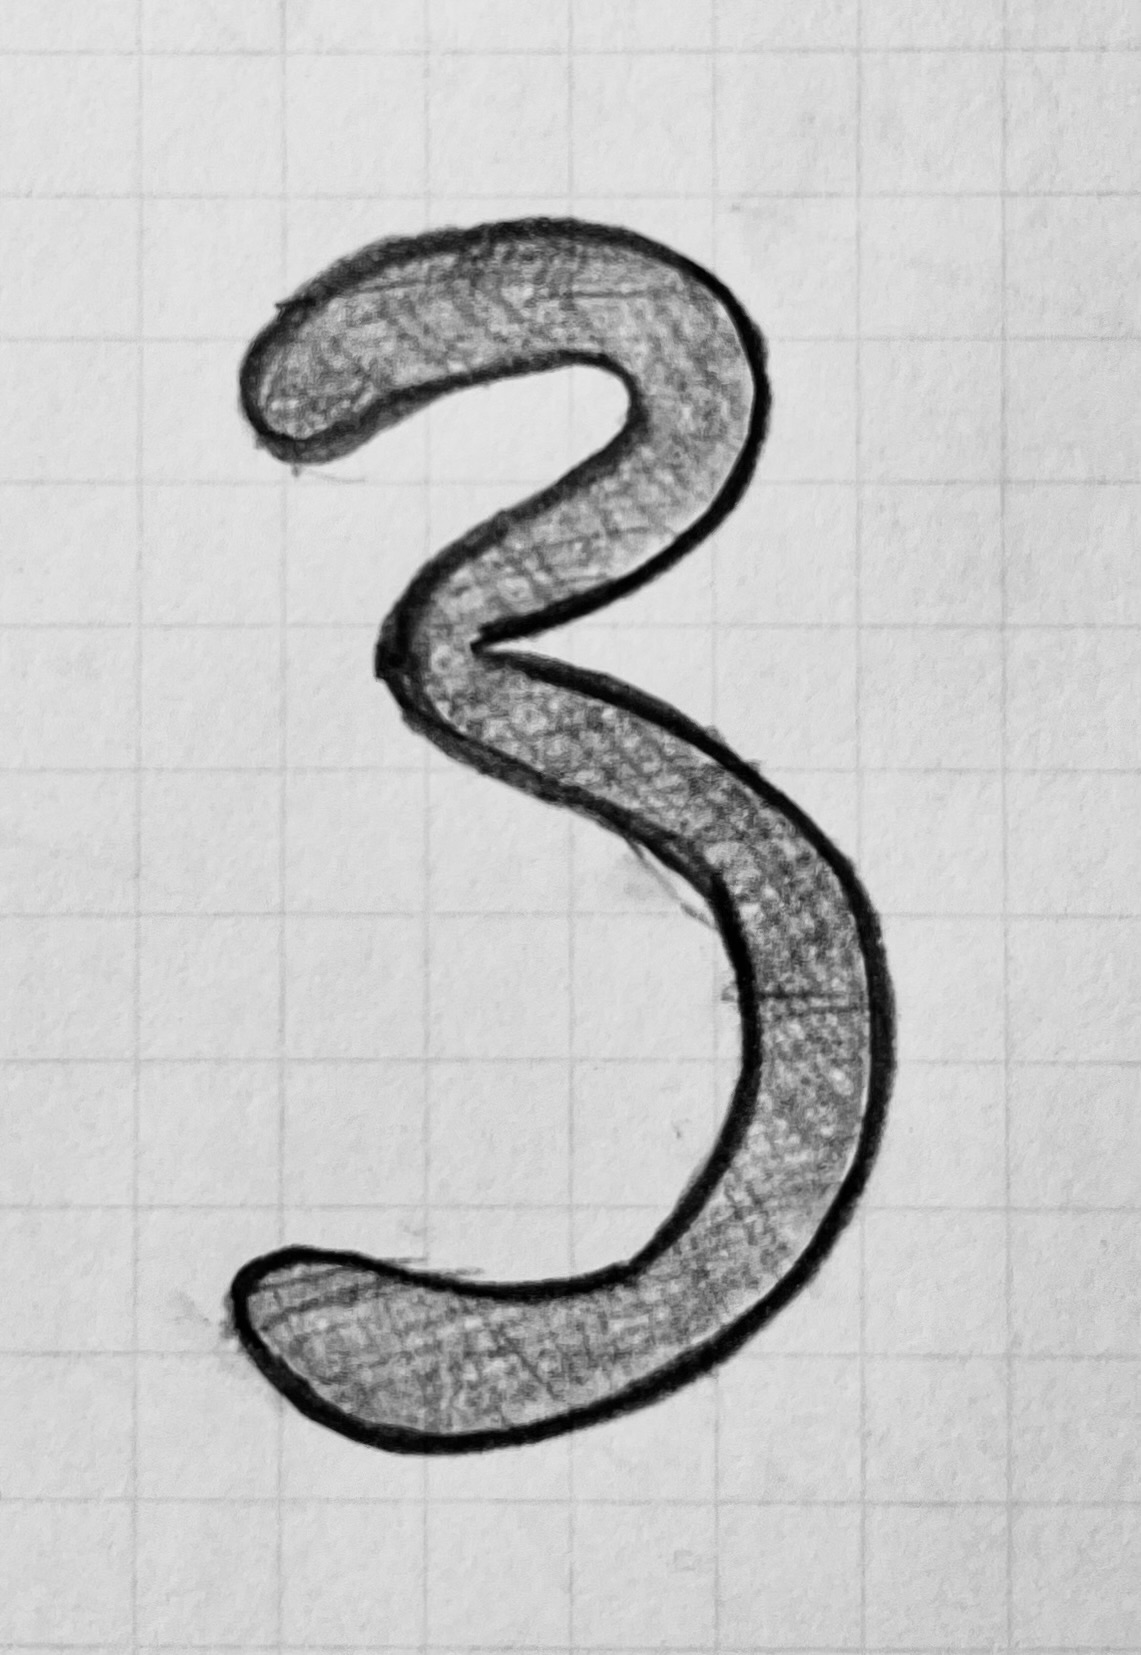

In [ ]:
gray_im_test_02 = im_test_02.convert('L')
gray_im_test_02

In [ ]:
input_02 = transform_sp(ImageOps.invert(gray_im_test_02))
input_02

tensor([[[-7.5584e-01, -7.5156e-01, -7.5425e-01, -7.4899e-01, -7.5466e-01,
          -7.4003e-01, -7.3122e-01, -7.4053e-01, -7.5701e-01, -7.6286e-01,
          -7.4782e-01, -7.5846e-01, -7.5168e-01, -7.3907e-01, -7.4025e-01,
          -7.4095e-01, -7.4574e-01, -7.2431e-01, -7.2157e-01, -7.0311e-01,
          -6.9474e-01, -6.9471e-01, -6.9326e-01, -6.8059e-01, -6.5401e-01,
          -6.5124e-01, -6.5419e-01, -6.5612e-01],
         [-7.5556e-01, -7.5330e-01, -7.5361e-01, -7.4786e-01, -7.5399e-01,
          -7.4860e-01, -7.4524e-01, -7.5603e-01, -7.5836e-01, -7.5675e-01,
          -7.3886e-01, -7.5040e-01, -7.4236e-01, -7.3299e-01, -7.3094e-01,
          -7.4225e-01, -7.4120e-01, -7.2291e-01, -7.1870e-01, -6.9849e-01,
          -6.8798e-01, -6.8274e-01, -6.9808e-01, -6.8719e-01, -6.5944e-01,
          -6.6074e-01, -6.6322e-01, -6.5970e-01],
         [-7.4903e-01, -7.4802e-01, -7.5011e-01, -7.4058e-01, -7.5031e-01,
          -7.5315e-01, -7.4894e-01, -7.5348e-01, -7.5453e-01, -7.5523e-01,


In [ ]:
input_02_x = input_02.view(-1)
input_02_x.shape

torch.Size([784])

In [ ]:
out_02 = net_inf(input_02_x.unsqueeze(0))
out_02

tensor([[-1.2558,  0.7357, -0.3037,  5.9743, -3.9380,  3.1856, -3.4690, -0.4863,
         -0.1419, -1.3886]], grad_fn=<AddmmBackward0>)